In [1]:
%load_ext autoreload
%autoreload

In [2]:
from utils_v1 import *


In [3]:
from icecream import ic
import pdb
from sklearn import metrics
import importlib
import utils_v1
import pathlib
import cv2
import sys
import numpy as np
from src import metrics as _metrics
import src.loss as loss
from src.dataset import (
    MultipleDates,
    PA, PADeforestationTime, PADistanceMap, PAMultipleDates,
    MTDeforestationTime,
    MTMultipleDates,
    MAMultipleDates
)

# from src.dataset_legacy import MTDeforestationTime
from src import training_generator as generator
from src.patchesHandler import PatchesHandler, PatchesHandlerMultipleDates
from src.trainer.multioutput import TrainerMCDropout
from src.backend.Logger import Logger


In [4]:
from enum import Enum
UncertaintyMethod = Enum('UncertaintyMethod', 'pred_var MI pred_entropy KL pred_entropy_single')
uncertaintyMethod = "pred_entropy"
# uncertaintyMethod = "pred_var"
# uncertaintyMethod = "MI"
# uncertaintyMethod = "KL"

# uncertaintyMethod = "pred_entropy_single"


In [5]:
useLessInferenceRuns = False
reducedInferenceRuns = 30

In [6]:

config = {
	"training": False,
	"save_probabilities": False,
	"loadInference": False,
	"addPastDeforestationInput": True,
	"inference_times": 10,
	"removePolygons": True,
	"uncertainty_method": uncertaintyMethod,
	"classes_mode": True,
	"learning_rate": 1e-4
}
print(config)

'''
if training == True:
	dates = [2017, 2018]
else:
	dates = [2018, 2019]
if training == True:
	dates = [2018, 2019]
else:
	dates = [2019, 2020]
'''
# dates = [2020, 2021]
# dataset = MAMultipleDates(dates = dates, # dates = [2017, 2018, 2019]. [2018, 2019]. [2015, 2016, 2017, 2018]
# 	addPastDeforestationInput = config['addPastDeforestationInput'],
# 	borderBuffer = 2)	

dates = [2018, 2019]
dataset = PAMultipleDates(dates = dates, # dates = [2017, 2018, 2019]. [2018, 2019]. [2015, 2016, 2017, 2018]
	addPastDeforestationInput = config['addPastDeforestationInput'],
	borderBuffer = 2)	
# dates = [2019, 2020]
# dataset = MTMultipleDates(dates = dates, # dates = [2016,2017,2018,2019]
#  	addPastDeforestationInput = config['addPastDeforestationInput'],
# 	borderBuffer = 2)	

if issubclass(type(dataset), MultipleDates):
	patchesHandler = PatchesHandlerMultipleDates(
		dataset)
else:
	patchesHandler = PatchesHandler()

inference_times = config['inference_times']


if config['training'] == False:
	if type(dataset) == PA:
		exp = 2

	if type(dataset) == PADeforestationTime:
		# exp = 3 # uses past deforestation mask until 2020, which is a mistake. use it until 2018
		exp = 4 # uses past deforestation mask without dates.
		exp = 5 # uses past deforestation mask with dates. 38 epochs.
		exp = 5 # fixes mask.
		exp = 6 # uses past deforestation distance and past deforestation. didnt test it yet        
		exp = 8 # Uses fixed past deforestation distance and past deforestation. 98.9 mAP
		exp = 9 # dummy for coords. high mAP. 99.8.   
		exp = 10 # using fixed fixed past deforestation distance. mAP 90.7   
		exp = 12 # Multiple dates. using fixed fixed past deforestation distance. mAP reduced to 89.6
	if type(dataset) == PADistanceMap:
		exp = 7 # not so good result.
	if type(dataset) == PAMultipleDates:
		exp = 11 # Multiple dates. using fixed fixed past deforestation distance
		exp = 22
		exp = 50
		exp = 52
		# exp = 54
		exp = 56
		exp = 58
		# exp = 63
		# exp = 52
		# exp = 64
		# exp = 66
		exp = 66
		exp = 68
		
		# =============
		# exp = 72 # train 2015-2018
		# exp = 69 # train 2016-2018
		# exp = 70 # train 2017-2018
		
		# train 2018-2019. test 2018-2019
		# exp = 39 # old 
		exp = 76 # 88.4 mAP
		# exp = 71 # 89.5 mAP

		# =============
		
		### exp = 73
		# exp = 71
		# exp = 61

		exp = 77 # good?
		# exp = 78 # good but too short?

		exp = 90 # good result. label ok. f1 84.4 train 2018-2019
		exp = 92 # train 2017-2018
		exp = 93 # train 2016-2018
		exp = 94 # train 2015-2018
		
		exp = 96 # train 2018-2019
		exp = 97 # train 2017-2018
		exp = 98 # train 2016-2018
		exp = 99 # train 2015-2018


		exp = 103


		# train 2017-2018
		# exp = 138
		# exp = 140
		# exp = 147
	if type(dataset) == MTDeforestationTime:
		exp = 28
	if type(dataset) == MTMultipleDates:
		exp = 73 # train 2018-2019
		# exp = 74 # train 2016-2019
		# exp = 75 # train 2017-2019
		
		exp = 78 # 2019-2020

		# exp = 88 adds project past deforestation to label
		exp = 89 # ok label. so so result
		
		exp = 91 # ok label. Good result. 81.8 F1. train 2019-2020
		exp = 95 # train 2018-2019
		exp = 100 # train 2017-2019
		exp = 101 # train 2016-2019
		exp = 102 # train 2016-2019
		
		# train 2018-2019
		exp = 137

		exp = 117
		exp = 113
		exp = 110
		exp = 112
		exp = 116

	if type(dataset) == MAMultipleDates:
		exp = 146		
else:
	# exp = 13 # Multiple dates. using fixed fixed past deforestation distance
	# exp = 174
	exp = 176

logger = Logger()
trainer = TrainerMCDropout(config, dataset, patchesHandler, logger)

trainer.defineExperiment(exp)


{'training': False, 'save_probabilities': False, 'loadInference': False, 'addPastDeforestationInput': True, 'inference_times': 10, 'removePolygons': True, 'uncertainty_method': 'pred_entropy', 'classes_mode': True, 'learning_rate': 0.0001}


ic| list(self.date_ids): [0]
ic| self.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]
ic| self.input_image_shape: 21
ic| self.dataset.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]


In [7]:
exp

103

In [8]:
trainer.setExperimentPath()
trainer.createLogFolders()

In [9]:
# ic(type(dataset), exp, dataset.dates)


In [10]:

trainer.loadLabel()

D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


Removing bufer................
Mask label shape:  
 (17730, 9203, 1) 
 Unique values:  
 [0 1 2]


In [11]:

# Creating tile mask
trainer.createTrainValTestTiles()


Tiles size:  3546 2300
Mask size:  (17730, 9200)


In [12]:

trainer.label_mask.dtype

dtype('uint8')

In [13]:

trainer.getLabelCurrentDeforestation()

In [14]:

trainer.loadInputImage()

ic| image_stack.shape: (17730, 9203, 21)


Image shape:  (17730, 9203, 21)
mask:  (17730, 9200)
image stack:  (17730, 9200, 21)
ref : (17730, 9200, 1)


In [15]:

np.unique(trainer.image_stack[...,0], return_counts=True)

(array([0.        , 0.08333334, 0.16666667, 0.25      , 0.33333334,
        0.4166667 , 0.5       , 0.5833334 , 0.6666667 , 0.75      ,
        0.8333334 , 0.9166667 , 1.        ], dtype=float32),
 array([104050616,   2209014,    644713,    968315,   1458862,   1560879,
          2477424,   1299508,    903419,    864429,   4570932,   3150455,
         38957434], dtype=int64))

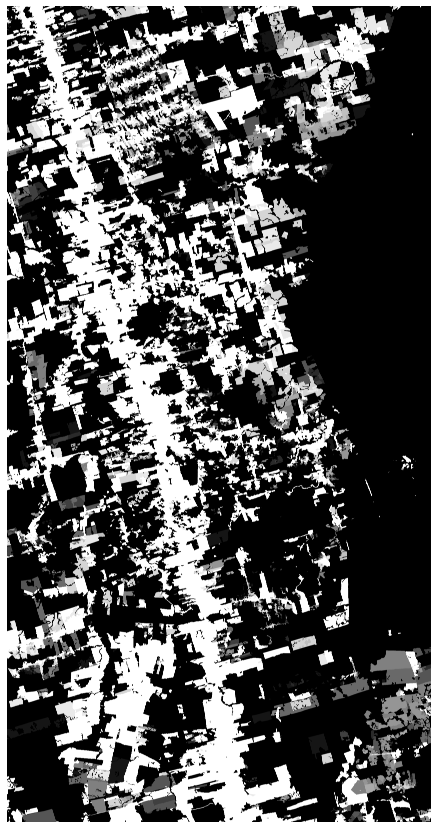

In [16]:

trainer.logger.plotFigure(trainer.image_stack[...,0], 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False)

In [17]:

trainer.getImageChannels()

ic| self.image_stack.shape: (17730, 9200, 21)
ic| self.channels: 21


In [18]:

trainer.getTrainValTestMasks()

Training tiles:  [1, 3, 5, 8, 11, 13, 14, 20]
Validation tiles:  [6, 19]
Test tiles:  [2, 4, 7, 9, 10, 12, 15, 16, 17, 18]


In [19]:

if config["training"] == True:
    # Extracting patches from the idx matrix
    trainer.createIdxImage()


In [20]:
if config["training"] == True:
    trainer.extractCoords()

In [21]:
if config["training"] == True:
    trainer.trainTestSplit()

In [22]:
if config["training"] == True:
    trainer.label_mask.shape

In [23]:
if config["training"] == True:
    if type(dataset) != PADeforestationTime and type(dataset) != MTDeforestationTime:
        trainer.logger.plotFigure(trainer.label_mask[...,-1], 
            name='Reference', cmap=plt.cm.gray, savefig=False)

    else:
        trainer.logger.plotFigure(trainer.label_mask[...,-1], 
            name='Reference', cmap=plt.cm.gray, savefig=False)



In [24]:
if config["training"] == True:
    np.unique(trainer.label_mask)

In [25]:
if config["training"] == True:
    print(trainer.coords_train)

In [26]:
if config["training"] == True:
    trainer.retrieveSamplesOfInterest()

In [27]:
if config["training"] == True:
    inputSnipShow = True

In [28]:
# count, unique = np.unique(label_mask, return_counts=True)
# print(count, unique)
# print(unique[1]/unique[0])

In [29]:
'''
count, unique = np.unique(label_mask[mask_amazon_ts == 1], return_counts=True)
print(count, unique)
print(unique[1]/unique[0])
'''

'\ncount, unique = np.unique(label_mask[mask_amazon_ts == 1], return_counts=True)\nprint(count, unique)\nprint(unique[1]/unique[0])\n'

In [30]:
'''
count, unique = np.unique(label_mask[mask_tr_val == 1], return_counts=True)
print(count, unique)
print(unique[1]/unique[0])
'''

'\ncount, unique = np.unique(label_mask[mask_tr_val == 1], return_counts=True)\nprint(count, unique)\nprint(unique[1]/unique[0])\n'

In [31]:
if config["training"] == True:
    if inputSnipShow == True:
        trainer.snipDataset(idx = 2800)


In [32]:
if config["training"] == True:
    if inputSnipShow == True:
        trainer.snipDataset(idx = 97)


In [33]:
if config["training"] == True:
    if inputSnipShow == True:

        trainer.snipDataset(idx = 1200)

In [34]:
if config["training"] == True:
    if inputSnipShow == True:

        trainer.snipDataset(idx = 400)

In [35]:
if config["training"] == True:
    trainer.getGenerators()


In [36]:
if config["training"] == True:
    trainer.fixChannelNumber()

In [37]:
if config["training"] == True:
    print(trainer.path_exp)

In [38]:
if config["training"] == True:
    print(trainer.channels)

In [39]:
if config["training"] == True:
    print(trainer.image_stack.shape)

In [40]:
if config["training"] == True:
    trainer.train()

In [41]:
if config["training"] == True:
    trainer.plotHistory()


In [42]:
trainer.image_stack.shape

(17730, 9200, 21)

In [43]:
if type(trainer.dataset) != PADeforestationTime and type(trainer.dataset) != MTDeforestationTime:
    trainer.patchesHandler.dataset.image_channels[-1]

In [44]:
if issubclass(type(dataset), MultipleDates):
	trainer.channels = trainer.patchesHandler.input_image_shape
	trainer.image_stack = trainer.image_stack[..., trainer.patchesHandler.dataset.image_channels[-1]]
	trainer.label_mask = trainer.label_mask[...,-1]


In [45]:
trainer.image_stack.shape

(17730, 9200, 21)

In [46]:
trainer.setPadding()

-30.0 -16.0


In [47]:
trainer.infer()

ic| self.path_models+ '/' + self.method +'_'+str(0)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/exp103/models/resunet_0.h5'


Dropout training mode: True
time:  0


UnboundLocalError: local variable 'predicted' referenced before assignment

In [ ]:
trainer.loadPredictedProbabilities()

In [ ]:
trainer.prob_rec.shape

(17760, 9216, 2, 10)

In [ ]:
'''
if useLessInferenceRuns == True:
    ic(reducedInferenceRuns)

    prob_rec_all = prob_rec.copy()
    prob_rec = prob_rec_all[:reducedInferenceRuns]
    prob_rec = np.transpose(np.squeeze(prob_rec), (1, 2, 0))
'''

'\nif useLessInferenceRuns == True:\n    ic(reducedInferenceRuns)\n\n    prob_rec_all = prob_rec.copy()\n    prob_rec = prob_rec_all[:reducedInferenceRuns]\n    prob_rec = np.transpose(np.squeeze(prob_rec), (1, 2, 0))\n'

In [ ]:
trainer.prob_rec.shape

(17760, 9216, 2, 10)

In [ ]:
trainer.getMeanProb()

In [ ]:
trainer.logger.getStats(trainer.mean_prob)

ic| np.min(value): 6.445299e-16
    np.mean(value): 0.014034766
    np.max(value): 0.99773014


In [ ]:
ic(trainer.mean_prob.shape)

ic| trainer.mean_prob.shape: (17760, 9216)


(17760, 9216)

In [ ]:
trainer.unpadMeanProb()

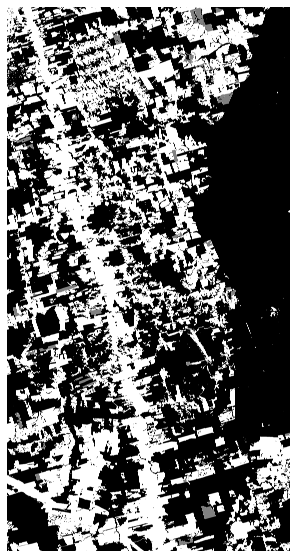

In [ ]:
trainer.logger.plotFigure(trainer.label_mask, 
            name='Reference mask', figsize=(10,10), cmap=plt.cm.gray, savefig=True)

In [ ]:
trainer.squeezeLabel()

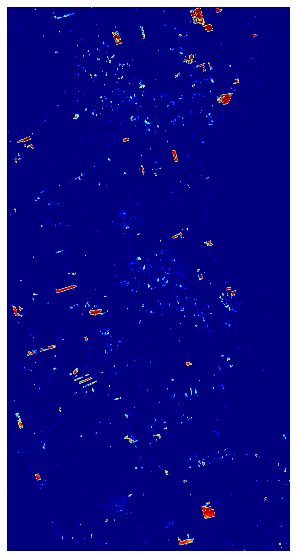

In [ ]:
trainer.setMeanProbNotConsideredAreas()
trainer.logger.plotFigure(trainer.mean_prob, 
            name='Mean predicted probability', figsize=(10,10), cmap='jet', savefig=False)

In [ ]:
print(trainer.label_mask.shape)

(17730, 9200)


In [ ]:
trainer.getLabelTest()

(54236371,)
(array([0, 1], dtype=uint8), array([53470765,   765606], dtype=int64))


In [ ]:
trainer.getMAP()

89.56


In [ ]:
trainer.prob_rec.shape

(17760, 9216, 2, 10)

In [ ]:
trainer.preprocessProbRec()
print(trainer.prob_rec.shape)

(10, 17760, 9216, 2)


In [ ]:
trainer.prob_rec.shape

(10, 17760, 9216, 2)

In [ ]:
trainer.logger.getStats(trainer.prob_rec)

ic| np.min(value): 1.6897421e-30
    np.mean(value): 0.31330824
    np.max(value): 1.0


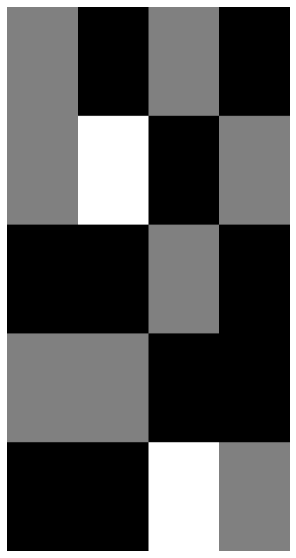

In [ ]:
trainer.logger.plotFigure(trainer.mask_tr_val, 
            name=trainer.dataset.site + trainer.title_name + ' Train val mask.png', figsize=(10,10), savefig=False)

In [ ]:
trainer.getLabelCurrentDeforestation()

In [ ]:
trainer.applyProbabilityThreshold()

(17730, 9200)
(array([0., 1.], dtype=float32), array([161243801,   1872199], dtype=int64))


ic| self.predicted_unpad.shape: (17730, 9200)
    self.predicted.shape: (17730, 9200)


In [ ]:
trainer.getTestValues()

ic| predicted_test.shape: (81558000,)
ic| predicted_test.shape: (54236371,)


In [ ]:
trainer.removeSmallPolygons()

ic| np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([161243801,   1872199], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([161418896,   1697104], dtype=int64))
ic| np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([162940905,    175095], dtype=int64))


In [ ]:
trainer.calculateMetrics()

ic| self.f1: 84.28, self.precision: 88.02, self.recall: 80.85


In [ ]:
trainer.getValidationValuesForMetrics()
trainer.calculateMetricsValidation()

ic| self.label_mask_val.shape: (16311600,)
ic| self.label_mask_val_valid.shape: (9432726,)
ic| f1_val: 87.01
    precision_val: 85.39
    recall_val: 88.69
    mAP_val: 92.58


In [ ]:
calculateMAPWithoutSmallPolygons = False
if calculateMAPWithoutSmallPolygons == True:
    trainer.calculateMAPWithoutSmallPolygons()

In [ ]:
trainer.get_label_no_buffer()

D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


In [ ]:
trainer.getErrorMask()

(array([0., 1.], dtype=float32), array([162510282,    605718], dtype=int64))


In [ ]:
trainer.getErrorMaskToShowRGB()

[0. 1.]


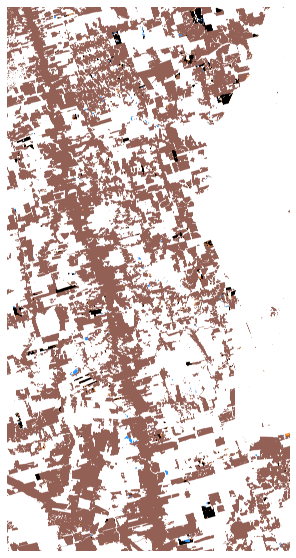

In [ ]:
trainer.logger.plotFigure(trainer.error_mask_to_show_rgb[...,::-1], 
            name=trainer.dataset.site + trainer.title_name + ' error mask color.png', 
            figsize=(10,10), savefig=True, dpi=300)

In [ ]:
'''
import types

trainer.setUncertainty = types.MethodType(setUncertainty, trainer)
'''


'\nimport types\n\ntrainer.setUncertainty = types.MethodType(setUncertainty, trainer)\n'

In [ ]:
trainer.setUncertainty()

K shape 2, pred_mean shape (17760, 9216, 2)


In [ ]:
trainer.getUncertaintyToShow()
trainer.logger.getStats(trainer.uncertainty_to_show)


ic| np.min(value): 0.0
    np.mean(value): 0.036205567
    np.max(value): 1.0614756


ic| trainer.uncertainty_to_show.shape: (17730, 9200)


(17730, 9200)

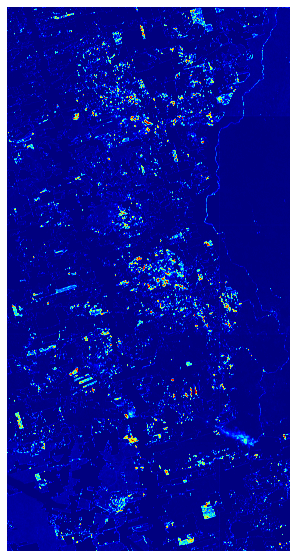

In [ ]:

trainer.logger.plotFigure(trainer.uncertainty_to_show, 
            name=trainer.dataset.site + trainer.title_name + ' uncertainty '+trainer.config['uncertainty_method']+'.png', figsize=(10,10), cmap='jet', savefig=True)

ic(trainer.uncertainty_to_show.shape)



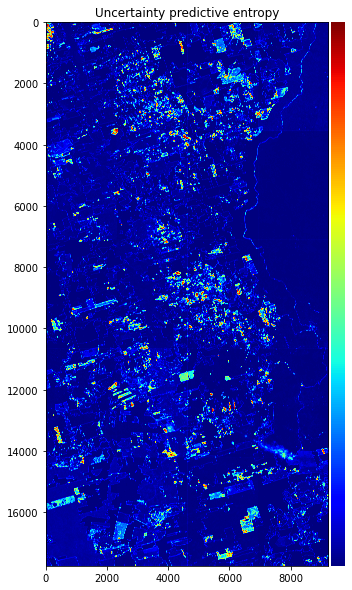

In [ ]:

import src.uncertainty
fig, ax = plt.subplots(1,1,figsize=(10,10))
src.uncertainty.show_im(trainer.uncertainty_map, ax, title = 'Uncertainty predictive entropy')
plt.axis('off')
plt.savefig('output/figures/Para' + trainer.title_name + ' uncertainty '+trainer.config['uncertainty_method']+'.png', 
    dpi=150, bbox_inches='tight')

In [ ]:
trainer.getValidationValues2()
trainer.getTestValues2()

ic| self.label_mask.shape: (17730, 9200)
ic| self.mask_amazon_ts.shape: (17730, 9200)
ic| self.label_mask_test.shape: (81558000,)
ic| self.error_mask_test.shape: (54154965,)


ic| trainer.dataset.previewLims1: array([2200, 3200, 6900, 7900])
    trainer.dataset.previewLims2: array([ 500, 1500, 3500, 4500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


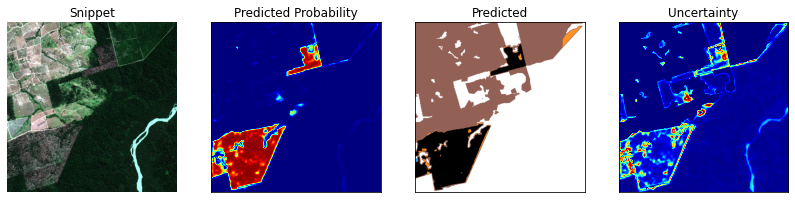

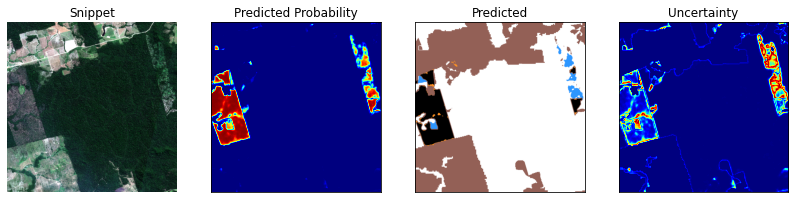

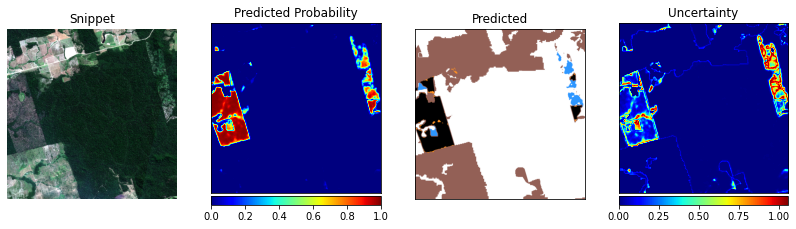

In [ ]:
trainer.logger.plotCropSample(trainer)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


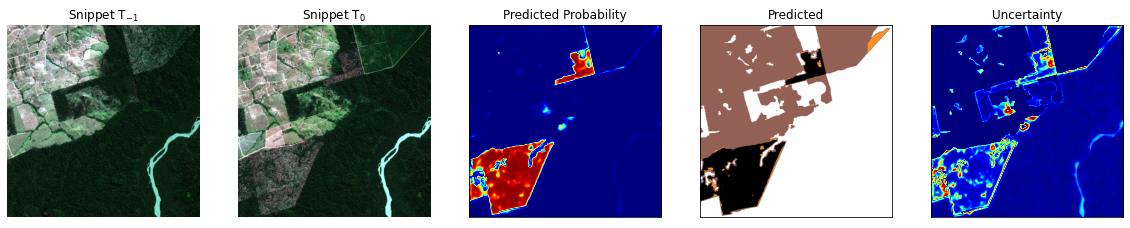

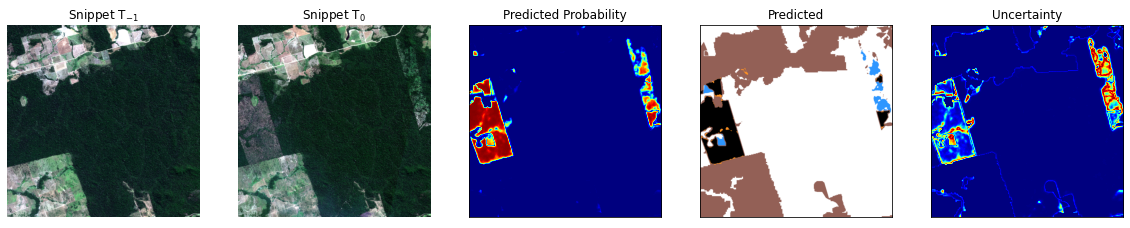

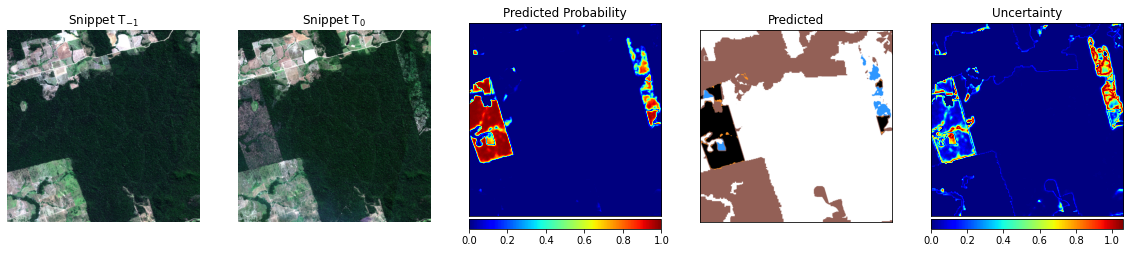

In [ ]:
trainer.logger.plotCropSampleT0T1(trainer)

In [ ]:
'''
dataset.previewLims1 = np.array([200, 700, 10200, 11200])
dataset.previewLims2 = np.array([2500, 3500, 6000, 7000])
'''

'\ndataset.previewLims1 = np.array([200, 700, 10200, 11200])\ndataset.previewLims2 = np.array([2500, 3500, 6000, 7000])\n'

In [ ]:
'''
import importlib
importlib.reload(_plt)
plotCropSampleFlag = True
if plotCropSampleFlag == True:
        importlib.reload(_metrics)
        importlib.reload(_plt)
        # import matplotlib
        # customCmap = matplotlib.colors.ListedColormap(['black', 'red'])
        ic(dataset.previewLims1, dataset.previewLims2)
        lims = dataset.previewLims1
        ic(np.unique(mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]))
        lims = dataset.previewLims2
        ic(np.unique(mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True))

        _plt.plotCropSample5(image_stack[...,previewBandsT0], image_stack[...,previewBandsT1], mean_prob, 
                error_mask_to_show_rgb[...,::-1], pred_entropy_to_show, 
                lims = dataset.previewLims1, 
                titles = ['Snippet $\mathregular{T_{-1}}$', 'Snippet $\mathregular{T_0}$', 'Predicted Probability', 'Predicted', 'Uncertainty'],
                cmaps = [plt.cm.gray, plt.cm.gray, 'jet', plt.cm.gray, 'jet'],
                maskBackground = [False, False, True, False, True],
                invertMask = [False, False, False, False, False], uncertainty_vlims = uncertainty_vlims)
        plt.savefig('output/figures/' + dataset.__class__.__name__ + 'PredictSampleUncertainty1_.png', dpi=150, bbox_inches='tight')

        _plt.plotCropSample5(image_stack[...,previewBandsT0], image_stack[...,previewBandsT1], mean_prob, 
                error_mask_to_show_rgb[...,::-1], pred_entropy_to_show, 
                lims = dataset.previewLims2, 
                titles = ['Snippet $\mathregular{T_{-1}}$', 'Snippet $\mathregular{T_0}$', 'Predicted Probability', 'Predicted', 'Uncertainty'],
                cmaps = [plt.cm.gray, plt.cm.gray, 'jet', plt.cm.gray, 'jet'],
                maskBackground = [False, False, True, False, True],
                invertMask = [False, False, False, False, False], uncertainty_vlims = uncertainty_vlims)
        plt.savefig('output/figures/' + dataset.__class__.__name__ + 'PredictSampleUncertainty2_.png', dpi=150, bbox_inches='tight')

        _plt.plotCropSample5(image_stack[...,previewBandsT0], image_stack[...,previewBandsT1], mean_prob, 
                error_mask_to_show_rgb[...,::-1], pred_entropy_to_show, 
                lims = dataset.previewLims2, 
                titles = ['Snippet $\mathregular{T_{-1}}$', 'Snippet $\mathregular{T_0}$', 'Predicted Probability', 'Predicted', 'Uncertainty'],
                cmaps = [plt.cm.gray, plt.cm.gray, 'jet', plt.cm.gray, 'jet'],
                maskBackground = [False, False, True, False, True],
                invertMask = [False, False, False, False, False], uncertainty_vlims = uncertainty_vlims,
                colorbar = True)
        plt.savefig('output/figures/' + dataset.__class__.__name__ + 'PredictSampleUncertaintyColorbar_.png', dpi=150, bbox_inches='tight')
'''

"\nimport importlib\nimportlib.reload(_plt)\nplotCropSampleFlag = True\nif plotCropSampleFlag == True:\n        importlib.reload(_metrics)\n        importlib.reload(_plt)\n        # import matplotlib\n        # customCmap = matplotlib.colors.ListedColormap(['black', 'red'])\n        ic(dataset.previewLims1, dataset.previewLims2)\n        lims = dataset.previewLims1\n        ic(np.unique(mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]))\n        lims = dataset.previewLims2\n        ic(np.unique(mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True))\n\n        _plt.plotCropSample5(image_stack[...,previewBandsT0], image_stack[...,previewBandsT1], mean_prob, \n                error_mask_to_show_rgb[...,::-1], pred_entropy_to_show, \n                lims = dataset.previewLims1, \n                titles = ['Snippet $\\mathregular{T_{-1}}$', 'Snippet $\\mathregular{T_0}$', 'Predicted Probability', 'Predicted', 'Uncertainty'],\n                cmaps = [plt.cm.gray, plt.cm.gray

In [ ]:
trainer.logger.getStats(trainer.uncertainty)


ic| np.min(value): 3.9327708e-05
    np.mean(value): 0.05182879
    np.max(value): 1.0614755


In [ ]:
'''
trainer.getOtherUncertaintyMetrics()
print(trainer.sUEO)

print(trainer.ece_score)  
'''

'\ntrainer.getOtherUncertaintyMetrics()\nprint(trainer.sUEO)\n\nprint(trainer.ece_score)  \n'

In [ ]:

def getUncertaintyAAValues(self):



    # self.threshold_list = [0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.25, 0.27, 0.3, 0.34, 0.36]

    # self.threshold_list = [0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.25, 0.27, 0.3, 0.34, 0.36, np.max(uncertainty)-0.003]
    if self.config['uncertainty_method'] == "pred_entropy":
            self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36, np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
            self.threshold_list = [0.0025, 0.025, 0.05, 0.1, 0.2, 0.4, 
                    0.5, 0.6, 0.7, 0.8, 0.9, np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
            self.threshold_list = [0.025, 0.05, 0.1, 0.2, 0.4, 
                    0.5, 0.6, 0.7, 0.8, 0.9, np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
                        
    elif self.config['uncertainty_method'] == "pred_var":
            self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [x*0.13/0.36 for x in self.threshold_list] + [np.max(self.uncertainty)-0.0015, np.max(self.uncertainty)-0.0008]
    elif self.config['uncertainty_method'] == "MI":
            self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [x*0.235/0.36 for x in self.threshold_list] + [np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
    elif self.config['uncertainty_method'] == "KL":
            self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [x*1.0/0.36 for x in self.threshold_list] + [np.max(self.uncertainty)-0.006, np.max(self.uncertainty)-0.003]
    elif self.config['uncertainty_method'] == "evidential":
            # self.threshold_list = [0.015, 0.03, 0.04]
            self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [ 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [ 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36, 0.45, 0.55, 0.65, 0.8]

            self.threshold_list = [0.13, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36, 0.45, 0.55, 0.65, 0.8]

            # self.threshold_list = [ 0.15, 0.2,  
            #          0.3, 0.35, 0.4, 0.5, 0.6, 0.7]

            # self.threshold_list = [0.015,0.1, 0.2, 0.27, 0.36, 0.45, 0.55, 0.65]

            # self.threshold_list = [x*1.0/0.36 for x in self.threshold_list] + [np.max(uncertainty)-0.006, np.max(uncertainty)-0.003]
                    
            # self.threshold_list = np.linspace(np.min(uncertainty) + 0.0015, np.max(uncertainty) - 0.0015, 19)
    print(self.threshold_list)
    self.loadThresholdMetrics = False
    if self.loadThresholdMetrics == False:
            # self.threshold_list = [0.1]
            # y_test
            ic(self.uncertainty.shape, self.label_mask_current_deforestation_test.shape)

            metrics_values = _metrics.getAA_Recall(self.uncertainty, 
                    self.label_mask_current_deforestation_test, 
                    self.predicted_test, self.threshold_list)

            # ic(metrics_values)


    self.m = {'precision_L': metrics_values[:,0],
            'recall_L': metrics_values[:,1],
            'recall_Ltotal': metrics_values[:,2],
            'AA': metrics_values[:,3],
            'precision_H': metrics_values[:,4],
            'recall_H': metrics_values[:,5],
            'UEO': metrics_values[:,6]}

    self.m['f1_L'] = 2*self.m['precision_L']*self.m['recall_L']/(self.m['precision_L']+self.m['recall_L'])
    self.m['f1_H'] = 2*self.m['precision_H']*self.m['recall_H']/(self.m['precision_H']+self.m['recall_H'])


In [ ]:

import types

trainer.getUncertaintyAAValues = types.MethodType(getUncertaintyAAValues, trainer)



Get precision-recall threshold

In [ ]:

trainer.getUncertaintyAAValues()

ic| self.uncertainty.shape: (54154965,)
    self.label_mask_current_deforestation_test.shape: (54154965,)


[0.025, 0.05, 0.1, 0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0584755153656007, 1.0599755153656005]
threshold 0.025


ic| label_current_deforestation_test_classified_incorrect.shape: (15554745,)
    predicted_test_classified_incorrect.shape: (15554745,)
ic| TP_H + FN_H + FP_H + TN_H: 15554745
    len(label_mask_current_deforestation_test): 54154965
ic| TP_H + FN_H + FP_H + TN_H: 15554745
    len(label_mask_current_deforestation_test): 54154965


[1.00000000e+00 5.10899183e-04 4.06860757e-06 2.87226573e-01
 8.80180950e-01 8.15001347e-01 1.39119189e-02]
threshold 0.05


ic| label_current_deforestation_test_classified_incorrect.shape: (7483626,)
    predicted_test_classified_incorrect.shape: (7483626,)
ic| TP_H + FN_H + FP_H + TN_H: 7483626
    len(label_mask_current_deforestation_test): 54154965
ic| TP_H + FN_H + FP_H + TN_H: 7483626
    len(label_mask_current_deforestation_test): 54154965


[1.         0.52831366 0.01377902 0.1381891  0.87835679 0.81601873
 0.02846452]
threshold 0.1


ic| label_current_deforestation_test_classified_incorrect.shape: (5320445,)
    predicted_test_classified_incorrect.shape: (5320445,)
ic| TP_H + FN_H + FP_H + TN_H: 5320445
    len(label_mask_current_deforestation_test): 54154965
ic| TP_H + FN_H + FP_H + TN_H: 5320445
    len(label_mask_current_deforestation_test): 54154965


[1.         0.82820461 0.08355021 0.09824482 0.86819282 0.80630589
 0.03929481]
threshold 0.2


ic| label_current_deforestation_test_classified_incorrect.shape: (3662741,)
    predicted_test_classified_incorrect.shape: (3662741,)
ic| TP_H + FN_H + FP_H + TN_H: 3662741
    len(label_mask_current_deforestation_test): 54154965
ic| TP_H + FN_H + FP_H + TN_H: 3662741
    len(label_mask_current_deforestation_test): 54154965


[0.99934497 0.90683296 0.24208351 0.06763444 0.83750085 0.77271037
 0.05538715]
threshold 0.4


ic| label_current_deforestation_test_classified_incorrect.shape: (2145274,)
    predicted_test_classified_incorrect.shape: (2145274,)
ic| TP_H + FN_H + FP_H + TN_H: 2145274
    len(label_mask_current_deforestation_test): 54154965
ic| TP_H + FN_H + FP_H + TN_H: 2145274
    len(label_mask_current_deforestation_test): 54154965


[0.99352985 0.92298175 0.46336287 0.03961362 0.76327794 0.69311593
 0.08805662]
threshold 0.5


ic| label_current_deforestation_test_classified_incorrect.shape: (1585983,)
    predicted_test_classified_incorrect.shape: (1585983,)
ic| TP_H + FN_H + FP_H + TN_H: 1585983
    len(label_mask_current_deforestation_test): 54154965
ic| TP_H + FN_H + FP_H + TN_H: 1585983
    len(label_mask_current_deforestation_test): 54154965


[0.98586256 0.92251628 0.54862189 0.02928601 0.71776154 0.64123902
 0.11229756]
threshold 0.6


ic| label_current_deforestation_test_classified_incorrect.shape: (1070273,)
    predicted_test_classified_incorrect.shape: (1070273,)
ic| TP_H + FN_H + FP_H + TN_H: 1070273
    len(label_mask_current_deforestation_test): 54154965
ic| TP_H + FN_H + FP_H + TN_H: 1070273
    len(label_mask_current_deforestation_test): 54154965


[0.97443435 0.91887131 0.61409664 0.01976316 0.67419931 0.586156
 0.15193221]
threshold 0.7


ic| label_current_deforestation_test_classified_incorrect.shape: (847359,)
    predicted_test_classified_incorrect.shape: (847359,)
ic| TP_H + FN_H + FP_H + TN_H: 847359
    len(label_mask_current_deforestation_test): 54154965
ic| TP_H + FN_H + FP_H + TN_H: 847359
    len(label_mask_current_deforestation_test): 54154965


[0.95995262 0.91322887 0.67039532 0.01564693 0.62720476 0.51942958
 0.16914276]
threshold 0.8


ic| label_current_deforestation_test_classified_incorrect.shape: (658832,)
    predicted_test_classified_incorrect.shape: (658832,)
ic| TP_H + FN_H + FP_H + TN_H: 658832
    len(label_mask_current_deforestation_test): 54154965
ic| TP_H + FN_H + FP_H + TN_H: 658832
    len(label_mask_current_deforestation_test): 54154965


[0.941005   0.90550031 0.71972583 0.01216568 0.57756742 0.43277564
 0.17885528]
threshold 0.9


ic| label_current_deforestation_test_classified_incorrect.shape: (477437,)
    predicted_test_classified_incorrect.shape: (477437,)
ic| TP_H + FN_H + FP_H + TN_H: 477437
    len(label_mask_current_deforestation_test): 54154965
ic| TP_H + FN_H + FP_H + TN_H: 477437
    len(label_mask_current_deforestation_test): 54154965


[0.91882748 0.89420217 0.76281374 0.00881613 0.51713396 0.31103358
 0.17873247]
threshold 1.0584755153656007


ic| label_current_deforestation_test_classified_incorrect.shape: (24494,)
    predicted_test_classified_incorrect.shape: (24494,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 24494
    len(label_mask_current_deforestation_test): 54154965
ic| TP_H + FN_H + FP_H + TN_H: 24494
    len(label_mask_current_deforestation_test): 54154965


[8.80181481e-01 8.15056704e-01 8.08515053e-01 4.52294633e-04
            nan 0.00000000e+00 2.45638648e-02]
threshold 1.0599755153656005


ic| label_current_deforestation_test_classified_incorrect.shape: (11370,)
    predicted_test_classified_incorrect.shape: (11370,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 11370
    len(label_mask_current_deforestation_test): 54154965
ic| TP_H + FN_H + FP_H + TN_H: 11370
    len(label_mask_current_deforestation_test): 54154965


[8.80181481e-01 8.11612454e-01 8.08515053e-01 2.09953049e-04
            nan 0.00000000e+00 1.21869356e-02]


In [ ]:
trainer.getUncertaintyAAAuditedValues()

ic| self.uncertainty.shape: (54154965,)
    self.label_mask_current_deforestation_test.shape: (54154965,)


threshold 0.025
(54154965,) (54154965,)
cm_audited [[53417612        0]
 [    5869   731484]]
[1.         0.99204045]
threshold 0.05
(54154965,) (54154965,)
cm_audited [[53417612        0]
 [    9071   728282]]
[1.         0.98769789]
threshold 0.1
(54154965,) (54154965,)
cm_audited [[53417612        0]
 [   12779   724574]]
[1.         0.98266909]
threshold 0.2
(54154965,) (54154965,)
cm_audited [[53417495      117]
 [   18339   719014]]
[0.9998373 0.9751286]
threshold 0.4
(54154965,) (54154965,)
cm_audited [[53415387     2225]
 [   28510   708843]]
[0.9968709  0.96133467]
threshold 0.5
(54154965,) (54154965,)
cm_audited [[53411811     5801]
 [   33977   703376]]
[0.9918201  0.95392031]
threshold 0.6
(54154965,) (54154965,)
cm_audited [[53405732    11880]
 [   39979   697374]]
[0.98325001 0.94578038]
threshold 0.7
(54154965,) (54154965,)
cm_audited [[53396990    20622]
 [   46968   690385]]
[0.97099607 0.93630188]
threshold 0.8
(54154965,) (54154965,)
cm_audited [[53384341    33271]
 

ic| metric_values_audited: array([[1.        , 0.99204045],
                                  [1.        , 0.98769789],
                                  [1.        , 0.98266909],
                                  [0.9998373 , 0.9751286 ],
                                  [0.9968709 , 0.96133467],
                                  [0.9918201 , 0.95392031],
                                  [0.98325001, 0.94578038],
                                  [0.97099607, 0.93630188],
                                  [0.95348275, 0.92488808],
                                  [0.93103353, 0.90974743],
                                  [0.88121932, 0.81654106],
                                  [0.88067722, 0.81233141]])


cm_audited [[53336457    81155]
 [  138378   598975]]
[0.88067722 0.81233141]


In [ ]:
trainer.setPlotLimsForUncertaintyAA()

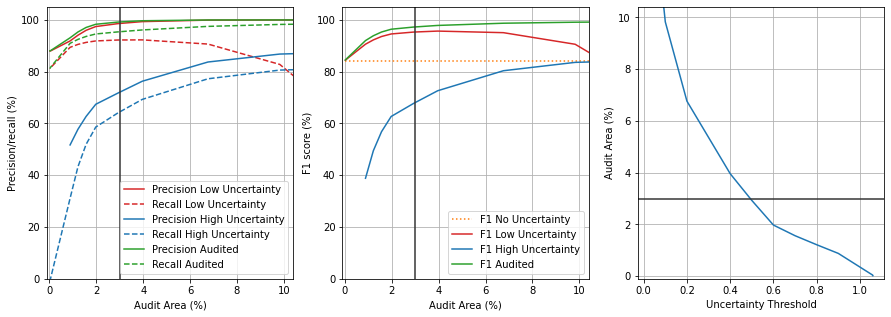

In [ ]:
'''
xlim = [-0.3, 12.7]
xlim = [-0.1, 10.4]

ylim = [0, 105]
'''
trainer.plotUncertaintyAA()

In [ ]:
trainer.getOptimalUncertaintyThreshold(bound = 0.0015)

ic| bounds: (0.0015, 1.0599755153656005)
c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "


0.40580167061009775
threshold 0.40580167061009775


ic| label_current_deforestation_test_classified_incorrect.shape: (2112790,)
    predicted_test_classified_incorrect.shape: (2112790,)
ic| TP_H + FN_H + FP_H + TN_H: 2112790
    len(label_mask_current_deforestation_test): 54154965
ic| TP_H + FN_H + FP_H + TN_H: 2112790
    len(label_mask_current_deforestation_test): 54154965


[0.99320091 0.92306748 0.46912944 0.03901378 0.76055058 0.69012904
 0.08915582]
0.6556738447555026
threshold 0.6556738447555026


ic| label_current_deforestation_test_classified_incorrect.shape: (940060,)
    predicted_test_classified_incorrect.shape: (940060,)
ic| TP_H + FN_H + FP_H + TN_H: 940060
    len(label_mask_current_deforestation_test): 54154965
ic| TP_H + FN_H + FP_H + TN_H: 940060
    len(label_mask_current_deforestation_test): 54154965


[0.96713781 0.91610785 0.64643393 0.0173587  0.64786144 0.55060492
 0.16251744]
0.25137217414540486
threshold 0.25137217414540486


ic| label_current_deforestation_test_classified_incorrect.shape: (3147444,)
    predicted_test_classified_incorrect.shape: (3147444,)
ic| TP_H + FN_H + FP_H + TN_H: 3147444
    len(label_mask_current_deforestation_test): 54154965
ic| TP_H + FN_H + FP_H + TN_H: 3147444
    len(label_mask_current_deforestation_test): 54154965


[0.99835054 0.91580932 0.3069995  0.05811921 0.82071575 0.75441066
 0.06348584]
0.5095076177116282
threshold 0.5095076177116282


ic| label_current_deforestation_test_classified_incorrect.shape: (1522694,)
    predicted_test_classified_incorrect.shape: (1522694,)
ic| TP_H + FN_H + FP_H + TN_H: 1522694
    len(label_mask_current_deforestation_test): 54154965
ic| TP_H + FN_H + FP_H + TN_H: 1522694
    len(label_mask_current_deforestation_test): 54154965


[0.98503051 0.92220931 0.55543952 0.02811735 0.71349752 0.63633543
 0.11613691]
0.5179978834967828
threshold 0.5179978834967828


ic| label_current_deforestation_test_classified_incorrect.shape: (1459028,)
    predicted_test_classified_incorrect.shape: (1459028,)
ic| TP_H + FN_H + FP_H + TN_H: 1459028
    len(label_mask_current_deforestation_test): 54154965
ic| TP_H + FN_H + FP_H + TN_H: 1459028
    len(label_mask_current_deforestation_test): 54154965


[0.98426741 0.92200564 0.56143394 0.02694172 0.70965706 0.63180272
 0.12042069]
0.47626904940098186
threshold 0.47626904940098186


ic| label_current_deforestation_test_classified_incorrect.shape: (1727301,)
    predicted_test_classified_incorrect.shape: (1727301,)
ic| TP_H + FN_H + FP_H + TN_H: 1727301
    len(label_mask_current_deforestation_test): 54154965
ic| TP_H + FN_H + FP_H + TN_H: 1727301
    len(label_mask_current_deforestation_test): 54154965


[0.98786907 0.92306585 0.53044742 0.03189552 0.72865743 0.65375111
 0.10480234]
0.4968116143543465
threshold 0.4968116143543465


ic| label_current_deforestation_test_classified_incorrect.shape: (1605919,)
    predicted_test_classified_incorrect.shape: (1605919,)
ic| TP_H + FN_H + FP_H + TN_H: 1605919
    len(label_mask_current_deforestation_test): 54154965
ic| TP_H + FN_H + FP_H + TN_H: 1605919
    len(label_mask_current_deforestation_test): 54154965


[0.98612863 0.92261346 0.54618344 0.02965414 0.71928559 0.64296327
 0.11116203]
0.492921090503148
threshold 0.492921090503148


ic| label_current_deforestation_test_classified_incorrect.shape: (1629909,)
    predicted_test_classified_incorrect.shape: (1629909,)
ic| TP_H + FN_H + FP_H + TN_H: 1629909
    len(label_mask_current_deforestation_test): 54154965
ic| TP_H + FN_H + FP_H + TN_H: 1629909
    len(label_mask_current_deforestation_test): 54154965


[0.9864562  0.9226974  0.54328117 0.03009713 0.72106288 0.64501883
 0.10981983]
0.4865605767841808
threshold 0.4865605767841808


ic| label_current_deforestation_test_classified_incorrect.shape: (1667654,)
    predicted_test_classified_incorrect.shape: (1667654,)
ic| TP_H + FN_H + FP_H + TN_H: 1667654
    len(label_mask_current_deforestation_test): 54154965
ic| TP_H + FN_H + FP_H + TN_H: 1667654
    len(label_mask_current_deforestation_test): 54154965


[0.98701318 0.92281052 0.53845309 0.03079411 0.72394951 0.64839652
 0.10779807]
0.4929778049625003
threshold 0.4929778049625003


ic| label_current_deforestation_test_classified_incorrect.shape: (1629556,)
    predicted_test_classified_incorrect.shape: (1629556,)
ic| TP_H + FN_H + FP_H + TN_H: 1629556
    len(label_mask_current_deforestation_test): 54154965
ic| TP_H + FN_H + FP_H + TN_H: 1629556
    len(label_mask_current_deforestation_test): 54154965


[0.98645002 0.92269903 0.54332592 0.03009061 0.72103691 0.64498445
 0.10983974]
0.4941811882921254
threshold 0.4941811882921254


ic| label_current_deforestation_test_classified_incorrect.shape: (1622193,)
    predicted_test_classified_incorrect.shape: (1622193,)
ic| TP_H + FN_H + FP_H + TN_H: 1622193
    len(label_mask_current_deforestation_test): 54154965
ic| TP_H + FN_H + FP_H + TN_H: 1622193
    len(label_mask_current_deforestation_test): 54154965


[0.98635578 0.92268569 0.5442278  0.02995465 0.72047901 0.64433607
 0.11025305]
0.4951859216430003
threshold 0.4951859216430003


ic| label_current_deforestation_test_classified_incorrect.shape: (1615967,)
    predicted_test_classified_incorrect.shape: (1615967,)
ic| TP_H + FN_H + FP_H + TN_H: 1615967
    len(label_mask_current_deforestation_test): 54154965
ic| TP_H + FN_H + FP_H + TN_H: 1615967
    len(label_mask_current_deforestation_test): 54154965


[0.98627262 0.92265039 0.54497778 0.02983968 0.72001838 0.64381891
 0.11059732]
0.4938859715630704
threshold 0.4938859715630704


ic| label_current_deforestation_test_classified_incorrect.shape: (1623987,)
    predicted_test_classified_incorrect.shape: (1623987,)
ic| TP_H + FN_H + FP_H + TN_H: 1623987
    len(label_mask_current_deforestation_test): 54154965
ic| TP_H + FN_H + FP_H + TN_H: 1623987
    len(label_mask_current_deforestation_test): 54154965


[0.98637147 0.92268498 0.54397961 0.02998778 0.72064403 0.64451919
 0.11015014]
0.4936934879812308
threshold 0.4936934879812308


ic| label_current_deforestation_test_classified_incorrect.shape: (1625155,)
    predicted_test_classified_incorrect.shape: (1625155,)
ic| TP_H + FN_H + FP_H + TN_H: 1625155
    len(label_mask_current_deforestation_test): 54154965
ic| TP_H + FN_H + FP_H + TN_H: 1625155
    len(label_mask_current_deforestation_test): 54154965


[0.98639478 0.92268612 0.54384264 0.03000934 0.72071896 0.64461863
 0.11008618]
0.4937522310831422
threshold 0.4937522310831422


ic| label_current_deforestation_test_classified_incorrect.shape: (1624793,)
    predicted_test_classified_incorrect.shape: (1624793,)
ic| TP_H + FN_H + FP_H + TN_H: 1624793
    len(label_mask_current_deforestation_test): 54154965
ic| TP_H + FN_H + FP_H + TN_H: 1624793
    len(label_mask_current_deforestation_test): 54154965


[0.9863889  0.92268934 0.5438996  0.03000266 0.72068362 0.64457358
 0.1101068 ]
0.49378557174000465
threshold 0.49378557174000465


ic| label_current_deforestation_test_classified_incorrect.shape: (1624594,)
    predicted_test_classified_incorrect.shape: (1624594,)
ic| TP_H + FN_H + FP_H + TN_H: 1624594
    len(label_mask_current_deforestation_test): 54154965
ic| TP_H + FN_H + FP_H + TN_H: 1624594
    len(label_mask_current_deforestation_test): 54154965


[0.98638203 0.92268723 0.54391587 0.02999899 0.72067922 0.64456375
 0.11011663]
0.4938189123973616
threshold 0.4938189123973616


ic| label_current_deforestation_test_classified_incorrect.shape: (1624357,)
    predicted_test_classified_incorrect.shape: (1624357,)
ic| TP_H + FN_H + FP_H + TN_H: 1624357
    len(label_mask_current_deforestation_test): 54154965
ic| TP_H + FN_H + FP_H + TN_H: 1624357
    len(label_mask_current_deforestation_test): 54154965
ic| self.threshold_optimal: 0.49378557174000465


[0.98637778 0.92268619 0.54394028 0.02999461 0.72066597 0.64454687
 0.11012965]


In [ ]:
trainer.getUncertaintyMetricsFromOptimalThreshold()

threshold 0.49378557174000465


ic| label_current_deforestation_test_classified_incorrect.shape: (1624594,)
    predicted_test_classified_incorrect.shape: (1624594,)
ic| TP_H + FN_H + FP_H + TN_H: 1624594
    len(label_mask_current_deforestation_test): 54154965
ic| TP_H + FN_H + FP_H + TN_H: 1624594
    len(label_mask_current_deforestation_test): 54154965


[0.98638203 0.92268723 0.54391587 0.02999899 0.72067922 0.64456375
 0.11011663]
threshold 0.49378557174000465
(54154965,) (54154965,)


ic| self.m_optimal: {'AA': array([0.02999899]),
                     'UEO': array([0.11011663]),
                     'f1': 84.28,
                     'f1_H': array([0.68049968]),
                     'f1_L': array([0.95347206]),
                     'precision_H': array([0.72067922]),
                     'precision_L': array([0.98638203]),
                     'recall_H': array([0.64456375]),
                     'recall_L': array([0.92268723]),
                     'recall_Ltotal': array([0.54391587])}
ic| self.m_audited_optimal: {'f1': array([0.97294278]),
                             'precision': array([0.99219355]),
                             'recall': array([0.95442481])}


cm_audited [[53412075     5537]
 [   33605   703748]]
[0.99219355 0.95442481]


{'metrics': {'precision_L': array([0.98638203]),
  'recall_L': array([0.92268723]),
  'recall_Ltotal': array([0.54391587]),
  'AA': array([0.02999899]),
  'precision_H': array([0.72067922]),
  'recall_H': array([0.64456375]),
  'UEO': array([0.11011663]),
  'f1_L': array([0.95347206]),
  'f1_H': array([0.68049968]),
  'f1': 84.28},
 'metrics_audited': {'precision': array([0.99219355]),
  'recall': array([0.95442481]),
  'f1': array([0.97294278])},
 'exp': 103}